In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\lenovo\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\lenovo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\lenovo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
c:\Users\lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
whole_df = pd.read_csv("../Dataset/IPL2008-2022.csv")
whole_df.head()

,Season,ID,Venue,MatchNumber,Team1,WinningTeam,TossWinner,TossDecision,T1Total,T1Balls_Faced,...,T2Total,T2Balls_Faced,T2Extra,T2Wickets,T24s,T26s,T2_Strike_Rate,T2_Avg,T1_BSR,T1_Eco
0,2008,335982,M Chinnaswamy Stadium,1,Kolkata Knight Riders,Kolkata Knight Riders,Royal Challengers Bangalore,field,222,124,...,82,101,19,10,3,3,0.811881,8.20,10.1,0.811881
1,2008,335983,"Punjab Cricket Association Stadium, Mohali",2,Chennai Super Kings,Chennai Super Kings,Chennai Super Kings,bat,240,124,...,207,124,11,4,18,9,1.669355,51.75,31.0,1.669355
2,2008,335984,Feroz Shah Kotla,3,Rajasthan Royals,Delhi Capitals,Rajasthan Royals,bat,129,122,...,132,97,10,1,18,1,1.360825,132.00,97.0,1.360825
3,2008,335985,"Wankhede Stadium, Mumbai",5,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,165,123,...,166,123,5,5,15,6,1.349593,33.20,24.6,1.349593
4,2008,335986,"Eden Gardens, Kolkata",4,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,110,118,...,112,122,28,5,5,4,0.918033,22.40,24.4,0.918033


In [3]:
toss_df = whole_df[["Season","Venue","MatchNumber","Team1","Team2","TossWinner","TossDecision"]] 

In [4]:
toss_df

,Season,Venue,MatchNumber,Team1,Team2,TossWinner,TossDecision
0,2008,M Chinnaswamy Stadium,1,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field
1,2008,"Punjab Cricket Association Stadium, Mohali",2,Chennai Super Kings,Punjab Kings,Chennai Super Kings,bat
2,2008,Feroz Shah Kotla,3,Rajasthan Royals,Delhi Capitals,Rajasthan Royals,bat
3,2008,"Wankhede Stadium, Mumbai",5,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat
4,2008,"Eden Gardens, Kolkata",4,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat
...,...,...,...,...,...,...,...
941,2022,"Wankhede Stadium, Mumbai",70,Sunrisers Hyderabad,Punjab Kings,Sunrisers Hyderabad,bat
942,2022,"Eden Gardens, Kolkata",Qualifier 1,Rajasthan Royals,Gujarat Titans,Gujarat Titans,field
943,2022,"Eden Gardens, Kolkata",Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,Lucknow Super Giants,field
944,2022,"Narendra Modi Stadium, Ahmedabad",Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field


In [5]:
train_data = toss_df[toss_df["Season"]<2022]
test_data = toss_df[toss_df["Season"]==2022]

In [6]:
train_data.shape

(872, 7)

In [7]:
(test_data["Team1"].unique())

array(['Chennai Super Kings', 'Mumbai Indians',
       'Royal Challengers Bangalore', 'Lucknow Super Giants',
       'Rajasthan Royals', 'Kolkata Knight Riders', 'Punjab Kings',
       'Gujarat Titans', 'Delhi Capitals', 'Sunrisers Hyderabad'],
      dtype=object)

In [8]:
train_data

,Season,Venue,MatchNumber,Team1,Team2,TossWinner,TossDecision
0,2008,M Chinnaswamy Stadium,1,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field
1,2008,"Punjab Cricket Association Stadium, Mohali",2,Chennai Super Kings,Punjab Kings,Chennai Super Kings,bat
2,2008,Feroz Shah Kotla,3,Rajasthan Royals,Delhi Capitals,Rajasthan Royals,bat
3,2008,"Wankhede Stadium, Mumbai",5,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat
4,2008,"Eden Gardens, Kolkata",4,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat
...,...,...,...,...,...,...,...
867,2021,Sharjah Cricket Stadium,35,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,field
868,2021,Dubai International Cricket Stadium,Qualifier 1,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field
869,2021,Sharjah Cricket Stadium,Eliminator,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,bat
870,2021,Sharjah Cricket Stadium,Qualifier 2,Delhi Capitals,Kolkata Knight Riders,Kolkata Knight Riders,field


In [9]:
print(train_data[~train_data["Team1"].isin(test_data["Team1"])]["Team1"].unique())
print(train_data.shape[0]-train_data[~train_data["Team1"].isin(test_data["Team1"])].shape[0])

['Deccan Chargers' 'Kochi Tuskers Kerala' 'Pune Warriors'
 'Rising Pune Supergiants' 'Gujarat Lions']
773


In [10]:
print(train_data[train_data["Venue"].isin(test_data["Venue"])]["Venue"].unique())
train_data = train_data[train_data["Venue"].isin(test_data["Venue"])]
train_data = train_data[train_data["Team1"].isin(test_data["Team1"])]
train_data = train_data[train_data["Team2"].isin(test_data["Team2"])]

['Wankhede Stadium, Mumbai' 'Eden Gardens, Kolkata'
 'Dr DY Patil Sports Academy, Mumbai' 'Brabourne Stadium, Mumbai'
 'Maharashtra Cricket Association Stadium'
 'Narendra Modi Stadium, Ahmedabad']


In [11]:
train_data

,Season,Venue,MatchNumber,Team1,Team2,TossWinner,TossDecision
3,2008,"Wankhede Stadium, Mumbai",5,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat
15,2008,"Eden Gardens, Kolkata",16,Kolkata Knight Riders,Mumbai Indians,Kolkata Knight Riders,bat
22,2008,"Dr DY Patil Sports Academy, Mumbai",23,Mumbai Indians,Delhi Capitals,Delhi Capitals,field
26,2008,"Dr DY Patil Sports Academy, Mumbai",27,Rajasthan Royals,Mumbai Indians,Mumbai Indians,field
28,2008,"Eden Gardens, Kolkata",29,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,bat
...,...,...,...,...,...,...,...
832,2021,"Narendra Modi Stadium, Ahmedabad",21,Punjab Kings,Kolkata Knight Riders,Kolkata Knight Riders,field
833,2021,"Narendra Modi Stadium, Ahmedabad",22,Royal Challengers Bangalore,Delhi Capitals,Delhi Capitals,field
836,2021,"Narendra Modi Stadium, Ahmedabad",25,Kolkata Knight Riders,Delhi Capitals,Delhi Capitals,field
837,2021,"Narendra Modi Stadium, Ahmedabad",26,Punjab Kings,Royal Challengers Bangalore,Royal Challengers Bangalore,field


<AxesSubplot: title={'center': 'Test data'}>

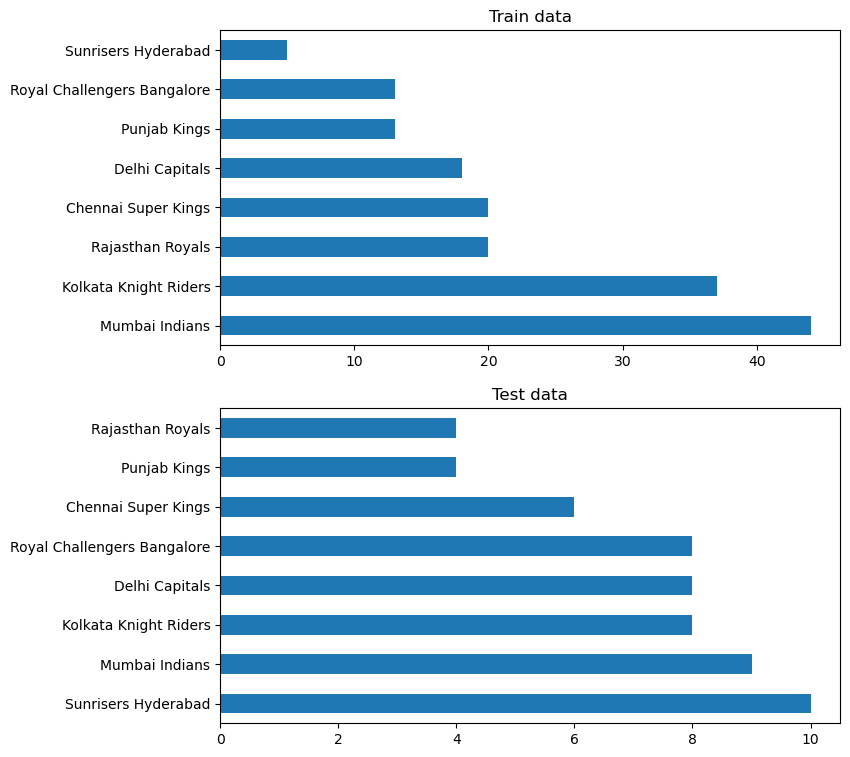

In [12]:
fig,ax = plt.subplots(2,1,figsize=(8,9))
train_data["TossWinner"].value_counts().plot(kind="barh",ax=ax[0],title="Train data")
test_data["TossWinner"].value_counts().drop(index=["Gujarat Titans","Lucknow Super Giants"],axis=1).plot(kind="barh",ax=ax[1],title="Test data")

In [13]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
train_data["MatchNumber"] = lab_enc.fit_transform(train_data["MatchNumber"])
train_data = pd.get_dummies(train_data,columns=["Venue","Team1","Team2","TossWinner"])

In [14]:
train_data

,Season,MatchNumber,TossDecision,"Venue_Brabourne Stadium, Mumbai","Venue_Dr DY Patil Sports Academy, Mumbai","Venue_Eden Gardens, Kolkata",Venue_Maharashtra Cricket Association Stadium,"Venue_Narendra Modi Stadium, Ahmedabad","Venue_Wankhede Stadium, Mumbai",Team1_Chennai Super Kings,...,Team2_Royal Challengers Bangalore,Team2_Sunrisers Hyderabad,TossWinner_Chennai Super Kings,TossWinner_Delhi Capitals,TossWinner_Kolkata Knight Riders,TossWinner_Mumbai Indians,TossWinner_Punjab Kings,TossWinner_Rajasthan Royals,TossWinner_Royal Challengers Bangalore,TossWinner_Sunrisers Hyderabad
3,2008,43,bat,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
15,2008,7,bat,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
22,2008,14,field,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
26,2008,18,field,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
28,2008,20,bat,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,2021,12,field,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
833,2021,13,field,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
836,2021,16,field,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
837,2021,17,field,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [15]:
X_train = train_data.drop(['TossWinner_Chennai Super Kings', 'TossWinner_Delhi Capitals',
       'TossWinner_Kolkata Knight Riders', 'TossWinner_Mumbai Indians',
       'TossWinner_Punjab Kings', 'TossWinner_Rajasthan Royals',
       'TossWinner_Royal Challengers Bangalore',
       'TossWinner_Sunrisers Hyderabad',"TossDecision"],axis=1)
Y_train = train_data[['TossWinner_Chennai Super Kings', 'TossWinner_Delhi Capitals',
       'TossWinner_Kolkata Knight Riders', 'TossWinner_Mumbai Indians',
       'TossWinner_Punjab Kings', 'TossWinner_Rajasthan Royals',
       'TossWinner_Royal Challengers Bangalore',
       'TossWinner_Sunrisers Hyderabad']]
Y_train = np.argmax(np.array(Y_train),axis=1) 
Y_train

array([3, 2, 1, 3, 2, 2, 3, 3, 2, 5, 3, 4, 1, 4, 5, 3, 2, 0, 3, 2, 3, 3,
       2, 2, 3, 5, 3, 3, 0, 2, 0, 6, 2, 4, 0, 1, 3, 3, 0, 3, 1, 5, 5, 2,
       1, 3, 2, 3, 6, 3, 0, 3, 2, 3, 2, 2, 2, 4, 3, 3, 5, 3, 3, 7, 5, 5,
       3, 4, 6, 0, 2, 6, 1, 2, 3, 4, 0, 0, 2, 4, 6, 3, 2, 4, 3, 2, 3, 2,
       5, 1, 7, 1, 5, 4, 6, 2, 5, 3, 6, 0, 2, 3, 3, 3, 4, 6, 7, 3, 3, 2,
       7, 1, 6, 2, 6, 3, 2, 0, 2, 1, 7, 1, 6, 5, 4, 3, 3, 1, 2, 0, 2, 2,
       0, 5, 2, 4, 0, 0, 5, 2, 0, 2, 3, 4, 0, 3, 1, 5, 0, 3, 2, 5, 3, 3,
       3, 1, 5, 5, 0, 1, 5, 2, 6, 5, 0, 2, 1, 1, 6, 1], dtype=int64)

In [16]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
test_data["MatchNumber"] = lab_enc.fit_transform(test_data["MatchNumber"])
test_data = pd.get_dummies(test_data,columns=["Venue","Team1","Team2","TossWinner"])
test_data.columns


C:\Users\lenovo\AppData\Local\Temp\ipykernel_26032\1356555322.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["MatchNumber"] = lab_enc.fit_transform(test_data["MatchNumber"])


Index(['Season', 'MatchNumber', 'TossDecision',
       'Venue_Brabourne Stadium, Mumbai',
       'Venue_Dr DY Patil Sports Academy, Mumbai',
       'Venue_Eden Gardens, Kolkata',
       'Venue_Maharashtra Cricket Association Stadium',
       'Venue_Narendra Modi Stadium, Ahmedabad',
       'Venue_Wankhede Stadium, Mumbai', 'Team1_Chennai Super Kings',
       'Team1_Delhi Capitals', 'Team1_Gujarat Titans',
       'Team1_Kolkata Knight Riders', 'Team1_Lucknow Super Giants',
       'Team1_Mumbai Indians', 'Team1_Punjab Kings', 'Team1_Rajasthan Royals',
       'Team1_Royal Challengers Bangalore', 'Team1_Sunrisers Hyderabad',
       'Team2_Chennai Super Kings', 'Team2_Delhi Capitals',
       'Team2_Gujarat Titans', 'Team2_Kolkata Knight Riders',
       'Team2_Lucknow Super Giants', 'Team2_Mumbai Indians',
       'Team2_Punjab Kings', 'Team2_Rajasthan Royals',
       'Team2_Royal Challengers Bangalore', 'Team2_Sunrisers Hyderabad',
       'TossWinner_Chennai Super Kings', 'TossWinner_Delhi C

In [17]:
test_data

,Season,MatchNumber,TossDecision,"Venue_Brabourne Stadium, Mumbai","Venue_Dr DY Patil Sports Academy, Mumbai","Venue_Eden Gardens, Kolkata",Venue_Maharashtra Cricket Association Stadium,"Venue_Narendra Modi Stadium, Ahmedabad","Venue_Wankhede Stadium, Mumbai",Team1_Chennai Super Kings,...,TossWinner_Chennai Super Kings,TossWinner_Delhi Capitals,TossWinner_Gujarat Titans,TossWinner_Kolkata Knight Riders,TossWinner_Lucknow Super Giants,TossWinner_Mumbai Indians,TossWinner_Punjab Kings,TossWinner_Rajasthan Royals,TossWinner_Royal Challengers Bangalore,TossWinner_Sunrisers Hyderabad
872,2022,0,field,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
873,2022,11,field,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
874,2022,22,field,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
875,2022,33,field,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
876,2022,44,field,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,2022,67,bat,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
942,2022,72,field,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
943,2022,70,field,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
944,2022,73,field,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
idex = test_data.index[(test_data["Team1_Gujarat Titans"]==1)|(test_data["Team2_Gujarat Titans"]==1)|(test_data["Team1_Lucknow Super Giants"]==1)
    |(test_data["Team2_Lucknow Super Giants"]==1)|(test_data["TossWinner_Lucknow Super Giants"]==1)|(test_data["TossWinner_Gujarat Titans"]==1)]

In [19]:
idex

Int64Index([875, 878, 881, 883, 886, 887, 891, 892, 895, 897, 900, 902, 906,
            908, 911, 913, 914, 916, 919, 922, 924, 928, 933, 934, 937, 938,
            942, 943, 945],
           dtype='int64')

In [20]:
test_data = test_data.drop(index=idex,axis=1)

In [21]:
test_data = test_data.drop(['Team1_Lucknow Super Giants','TossWinner_Lucknow Super Giants',
'Team2_Lucknow Super Giants','Team2_Gujarat Titans','Team1_Gujarat Titans','TossWinner_Gujarat Titans'],axis=1)

In [22]:
test_data

,Season,MatchNumber,TossDecision,"Venue_Brabourne Stadium, Mumbai","Venue_Dr DY Patil Sports Academy, Mumbai","Venue_Eden Gardens, Kolkata",Venue_Maharashtra Cricket Association Stadium,"Venue_Narendra Modi Stadium, Ahmedabad","Venue_Wankhede Stadium, Mumbai",Team1_Chennai Super Kings,...,Team2_Royal Challengers Bangalore,Team2_Sunrisers Hyderabad,TossWinner_Chennai Super Kings,TossWinner_Delhi Capitals,TossWinner_Kolkata Knight Riders,TossWinner_Mumbai Indians,TossWinner_Punjab Kings,TossWinner_Rajasthan Royals,TossWinner_Royal Challengers Bangalore,TossWinner_Sunrisers Hyderabad
872,2022,0,field,0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
873,2022,11,field,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
874,2022,22,field,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
876,2022,44,field,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
877,2022,55,field,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
879,2022,68,field,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
880,2022,69,field,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
882,2022,2,field,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
884,2022,4,field,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
885,2022,5,field,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [23]:
X_test = test_data.drop(['TossWinner_Chennai Super Kings', 'TossWinner_Delhi Capitals',
       'TossWinner_Kolkata Knight Riders', 'TossWinner_Mumbai Indians',
       'TossWinner_Punjab Kings', 'TossWinner_Rajasthan Royals',
       'TossWinner_Royal Challengers Bangalore',
       'TossWinner_Sunrisers Hyderabad',"TossDecision"],axis=1)
Y_test = test_data[['TossWinner_Chennai Super Kings', 'TossWinner_Delhi Capitals',
       'TossWinner_Kolkata Knight Riders', 'TossWinner_Mumbai Indians',
       'TossWinner_Punjab Kings', 'TossWinner_Rajasthan Royals',
       'TossWinner_Royal Challengers Bangalore',
       'TossWinner_Sunrisers Hyderabad']]



In [24]:
train_data.to_csv("../Dataset/traindata.csv",index=False)
test_data.to_csv("../Dataset/testdata.csv",index=False)
models = []
accur = []     

DecisionTree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion="gini",splitter="best",max_depth=8,min_samples_leaf=5,min_samples_split=5,max_features=14,random_state=84)
dtree_model = dtree.fit(X_train,Y_train)
ypre = dtree_model.predict(X_test)
ypre = np.eye(8)[ypre]
models.append("Decision Tree")
ypre

array([[0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 

In [35]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,ypre))
accur.append(accuracy_score(Y_test,ypre))

0.8888888888888888


Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [50,100,150,200, 300,350,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [13,15,20],
    'criterion' :['gini', 'entropy']
}
rf = RandomForestClassifier()
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, Y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [13, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200, 300, 350, 500]})

In [28]:
CV_rfc.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=15)

In [29]:
rf_model = CV_rfc.fit(X_train,Y_train)
ypre = rf_model.predict(X_test)


In [30]:
ypre = np.eye(8)[ypre]
from sklearn.metrics import accuracy_score
print(f" The accuracy of the model is {accuracy_score(Y_test,ypre)}")
models.append("Random Forest")
accur.append(accuracy_score(Y_test,ypre))

 The accuracy of the model is 0.7333333333333333


Knn

In [31]:
from sklearn.neighbors import KNeighborsClassifier  
knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=1 )  
knn_model = knn.fit(X_train, Y_train) 
knn_ypred = knn_model.predict(X_test)
knn_ypred = np.eye(8)[knn_ypred]
print("Accuracy Score {}".format(accuracy_score(Y_test,knn_ypred)))
models.append("KNN")
accur.append((accuracy_score(Y_test,knn_ypred)))

Accuracy Score 0.26666666666666666


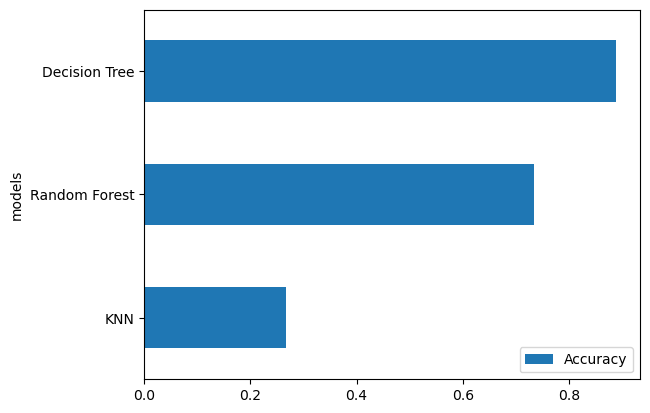

In [32]:
Accuracy = pd.DataFrame()
Accuracy["models"] = models
Accuracy["Accuracy"] = accur
Accuracy.sort_values(by="Accuracy").plot(kind="barh",x="models")
plt.show()

In [33]:
Accuracy

,models,Accuracy
0,Decision Tree,0.888889
1,Random Forest,0.733333
2,KNN,0.266667
